# Libraries

In [1]:
#Data Analysis
import pandas as pd
import numpy as np
from scipy import stats
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Sklearn preprocessing
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV, train_test_split
#metrics
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,precision_score,recall_score,f1_score

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('telecom_customer_churn.csv')

In [3]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


# DATA DICTIONARY

**CustomerID** = A unique ID that identifies each customer

**Gender** = The customer’s gender: Male, Female

**Age** = The customer’s current age, in years, at the time the fiscal quarter ended (Q2 2022)

**Married** = Indicates if the customer is married: Yes, No

**Number of Dependents** = Indicates the number of dependents that live with the customer (dependents could be children, parents, grandparents, etc.)

**City** = The city of the customer’s primary residence in California

**Zip Code** = The zip code of the customer’s primary residence

**Latitude** = The latitude of the customer’s primary residence

**Longitude** = The longitude of the customer’s primary residence

**Number of Referrals** = Indicates the number of times the customer has referred a friend or family member to this company to date

**Tenure in Months** = Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above

**Offer** = Identifies the last marketing offer that the customer accepted: None, Offer A, Offer B, Offer C, Offer D, Offer E

**Phone Service** = Indicates if the customer subscribes to home phone service with the company: Yes, No

**Avg Monthly Long Distance Charges** = Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above (if the customer is not subscribed to home phone service, this will be 0)

**Multiple Lines** = Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No (if the customer is not subscribed to home phone service, this will be No)

**Internet Service** = Indicates if the customer subscribes to Internet service with the company: Yes, No

**Internet Type** = Indicates the customer's type of internet connection: DSL, Fiber Optic, Cable (if the customer is not subscribed to internet service, this will be None)

**Avg Monthly GB Download** = Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above (if the customer is not subscribed to internet service, this will be 0)

**Online Security** = Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Online Backup** = Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Device Protection Plan** = Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Premium Tech Support** = Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Streaming TV** = Indicates if the customer uses their Internet service to stream television programing from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Streaming Movies** = Indicates if the customer uses their Internet service to stream movies from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Streaming Music** = Indicates if the customer uses their Internet service to stream music from a third party provider at no additional fee: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Unlimited Data** = Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No (if the customer is not subscribed to internet service, this will be No)

**Contract** = Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year

**Paperless Billing** = Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method** = Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge** = Indicates the customer’s current total monthly charge for all their services from the company

**Total Charges** = Indicates the customer’s total charges, calculated to the end of the quarter specified above

**Total Refunds** = Indicates the customer’s total refunds, calculated to the end of the quarter specified above

**Total Extra Data Charges** = Indicates the customer’s total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above

**Total Long Distance Charges** = Indicates the customer’s total charges for long distance above those specified in their plan, by the end of the quarter specified above

**Total Revenue** = Indicates the company's total revenue from this customer, calculated to the end of the quarter specified above (Total Charges - Total Refurnds + Total Extra Data Charges + Total Lond Distance Charges)

**Customer Status** = Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined

**Churn Category** = A high-level category for the customer’s reason for churning, which is asked when they leave the company: Attitude, Competitor, Dissatisfaction, Other, Price (directly related to Churn Reason)

**Churn Reason** = A customer’s specific reason for leaving the company, which is asked when they leave the company (directly related to Churn Category)

**Zip Code** = The zip code of the customer’s primary residence

**Population** = A current population estimate for the entire Zip Code area


# Data Preprocessing

In [4]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [5]:
df.drop(columns= ['Customer ID' , 'Zip Code'] , inplace=True)
df.shape

(7043, 36)

In [6]:
n_rows,n_columns = df.shape
print(f'Dataset has {n_rows} rows and {n_columns} columns')

Dataset has 7043 rows and 36 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Latitude                           7043 non-null   float64
 6   Longitude                          7043 non-null   float64
 7   Number of Referrals                7043 non-null   int64  
 8   Tenure in Months                   7043 non-null   int64  
 9   Offer                              7043 non-null   object 
 10  Phone Service                      7043 non-null   object 
 11  Avg Monthly Long Distance Charges  6361 non-null   float

In [8]:
df.select_dtypes(include='object').nunique() # Check categorical values 

Gender                       2
Married                      2
City                      1106
Offer                        6
Phone Service                2
Multiple Lines               2
Internet Service             2
Internet Type                3
Online Security              2
Online Backup                2
Device Protection Plan       2
Premium Tech Support         2
Streaming TV                 2
Streaming Movies             2
Streaming Music              2
Unlimited Data               2
Contract                     3
Paperless Billing            2
Payment Method               3
Customer Status              3
Churn Category               5
Churn Reason                20
dtype: int64

In [9]:
df.drop(columns= 'City', inplace=True) # So many unique values for one category

In [10]:
df.select_dtypes(include='object').nunique() # Check categorical values 

Gender                     2
Married                    2
Offer                      6
Phone Service              2
Multiple Lines             2
Internet Service           2
Internet Type              3
Online Security            2
Online Backup              2
Device Protection Plan     2
Premium Tech Support       2
Streaming TV               2
Streaming Movies           2
Streaming Music            2
Unlimited Data             2
Contract                   3
Paperless Billing          2
Payment Method             3
Customer Status            3
Churn Category             5
Churn Reason              20
dtype: int64

# EDA

In [11]:
def plot_bar_chart_with_percent_label(df, column, sort_by=None, ascending=True, gap_label_bar=0.5, figsize=(9, 6)):
    # Prepare data
    plot_data = df[column].value_counts().reset_index()
    plot_data.columns = [column, 'count']
    plot_data['percent'] = plot_data['count'] / len(df) * 100

    # Sort data if specified
    if sort_by is not None:
        plot_data.sort_values(by=sort_by, ascending=ascending, inplace=True)
    else:
        plot_data.sort_values(by='count', ascending=ascending, inplace=True)

    # Assign colors to bars
    num_bars = len(plot_data)
    colors = plt.cm.get_cmap('Set3', num_bars)

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.bar(plot_data[column], plot_data['percent'], color=colors(range(num_bars)))

    # Add labels
    for x, y in zip(plot_data[column], plot_data['percent']):
        ax.annotate(f'{y:.2f}%', xy=(x, y + gap_label_bar), ha='center')

    ax.set_xlabel(column)
    ax.set_ylabel('Percent')

    plt.show()


def plot_stacked_bar_with_percent_label(df, x_column, stacked_column, figsize=(9, 6)):
    # Prepare data
    plot_data = pd.crosstab(df[x_column], df[stacked_column], normalize='index') * 100

    # Assign colors to stacked bars
    num_bars = plot_data.shape[1]
    colors = plt.cm.get_cmap('Set1', num_bars)

    # Plot
    ax = plot_data.plot(kind='bar', stacked=True, figsize=figsize, color=colors(np.arange(num_bars)))

    # Add labels
    for container in ax.containers:
        for rect in container:
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()
            percentage = f'{height:.1f}%'
            if height > 0:
                ax.annotate(percentage, xy=(x + width / 2, y + height / 2), ha='center', va='center')

    ax.set_xlabel(x_column)
    ax.set_ylabel('Percent')

    plt.legend(title=stacked_column)

    plt.show()


In [12]:
columns_to_plot = df.columns

In [13]:
object_columns = df.select_dtypes(include=['object']).columns

In [14]:
columns_to_remove = ('Customer Status',
       'Churn Category', 'Churn Reason')

In [15]:
# Get a list of object (categorical) columns
object_columns = df.select_dtypes(include=['object']).columns

# Columns to remove
columns_to_remove = ('Customer Status', 'Churn Category', 'Churn Reason')

# Exclude columns in columns_to_remove from object_columns using list comprehension
object_columns = [column for column in object_columns if column not in columns_to_remove]

# Now object_columns only contains the desired columns
print(object_columns)


['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']


In [16]:
object_columns

['Gender',
 'Married',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method']

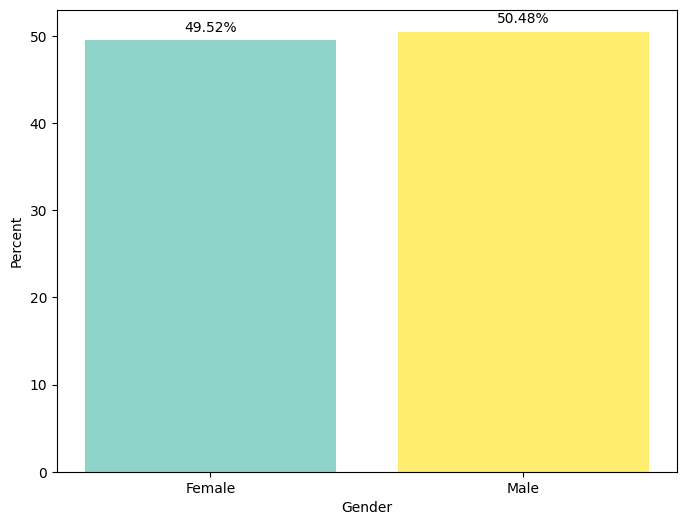

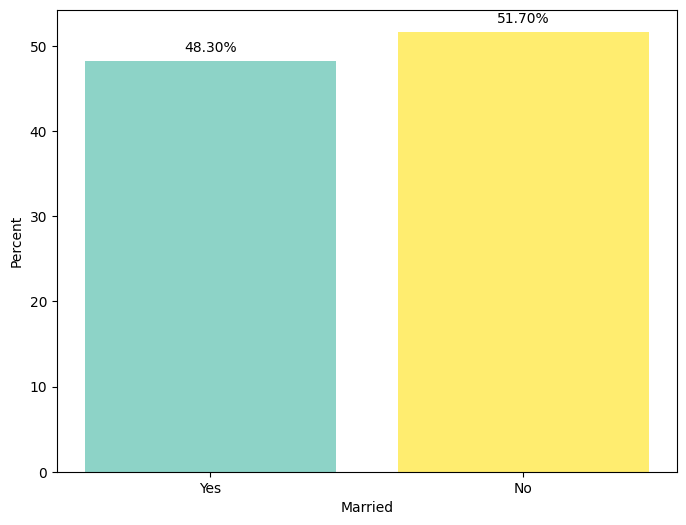

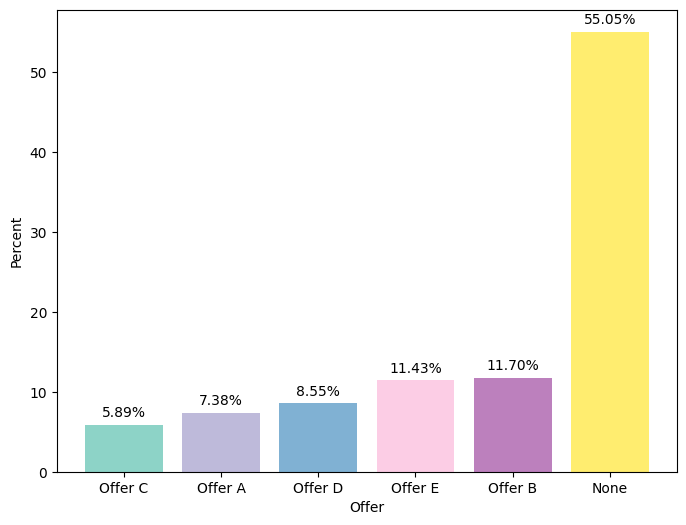

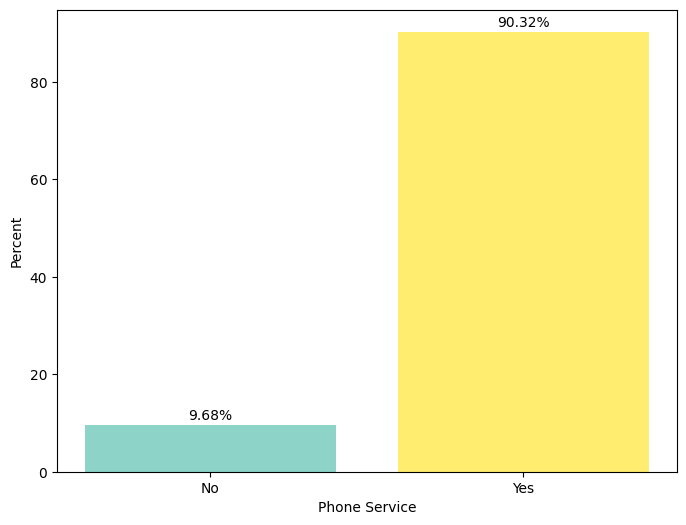

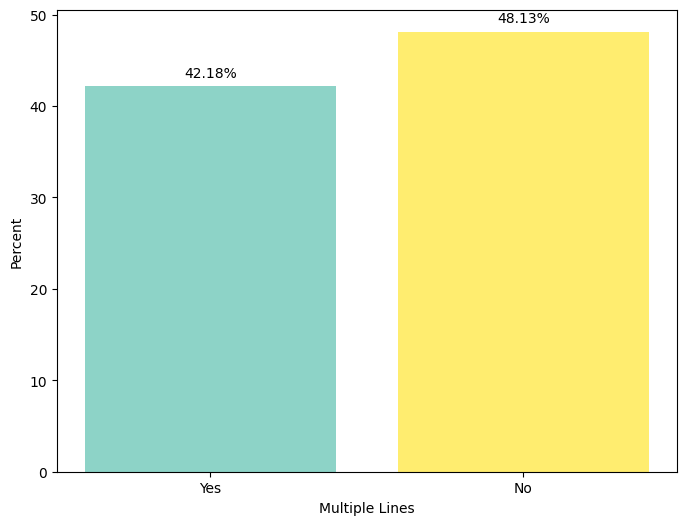

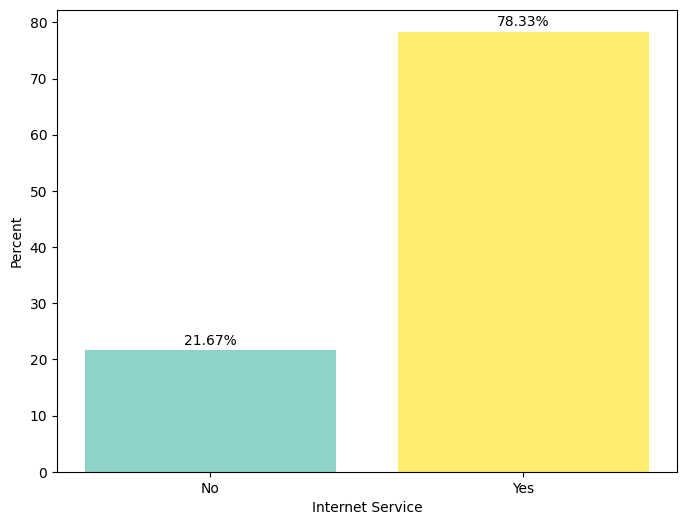

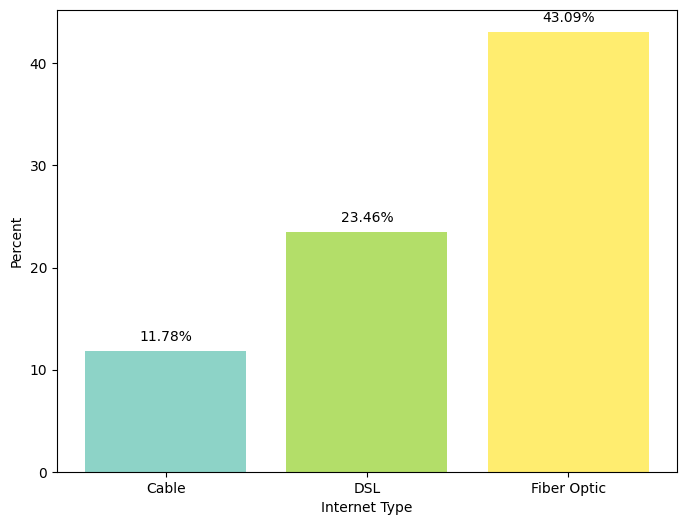

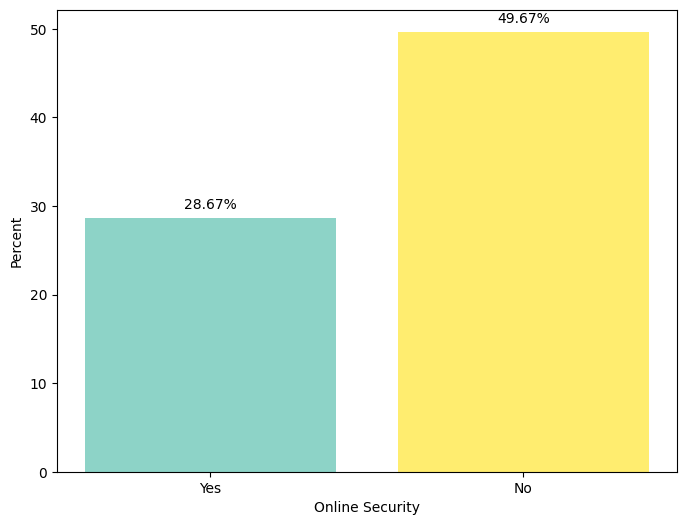

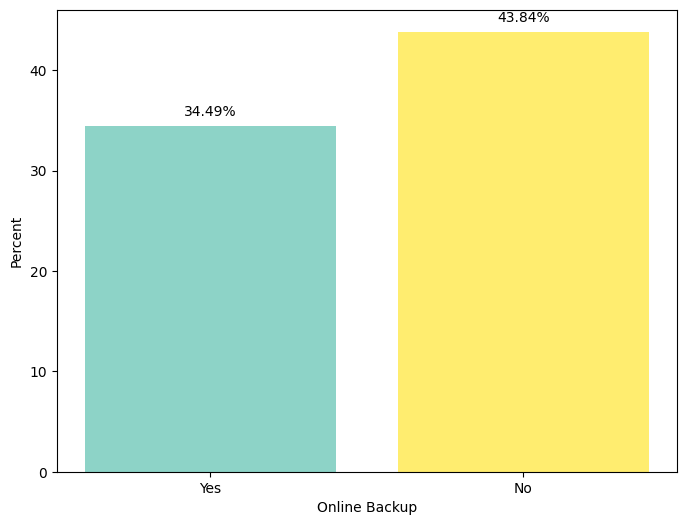

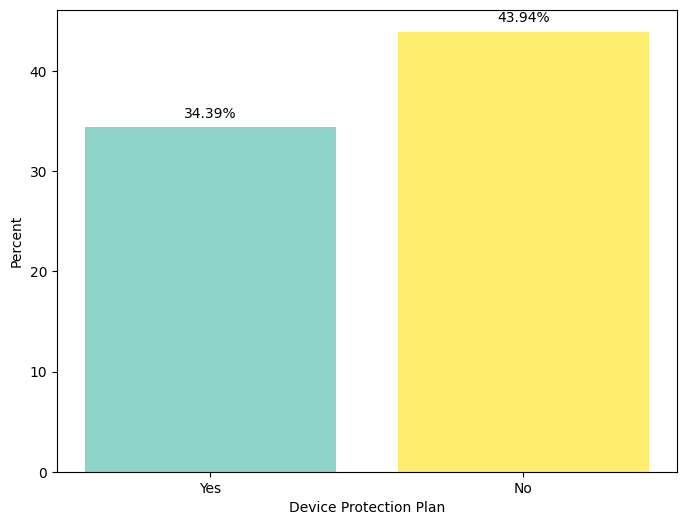

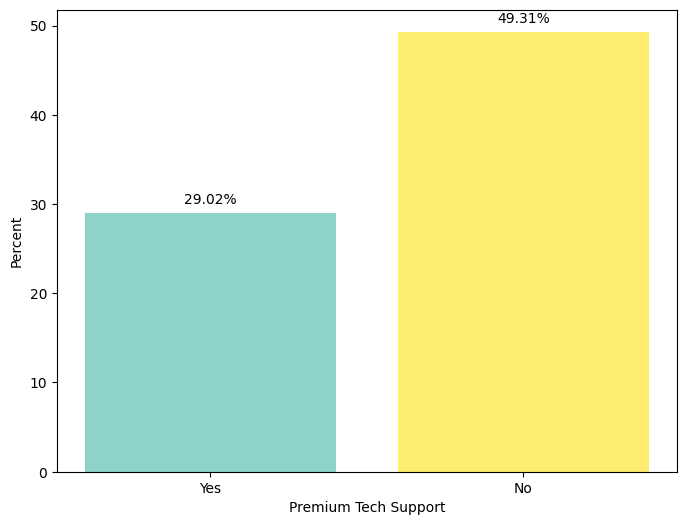

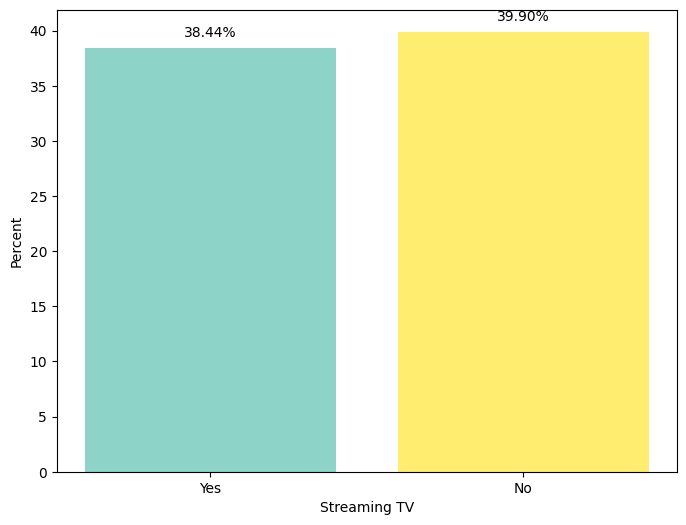

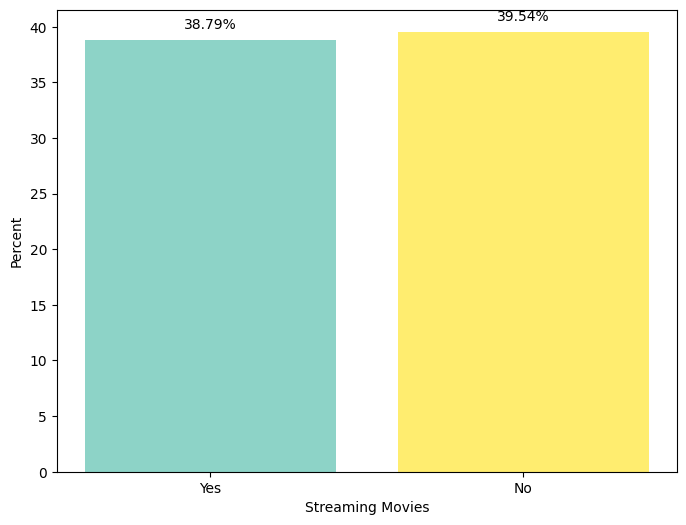

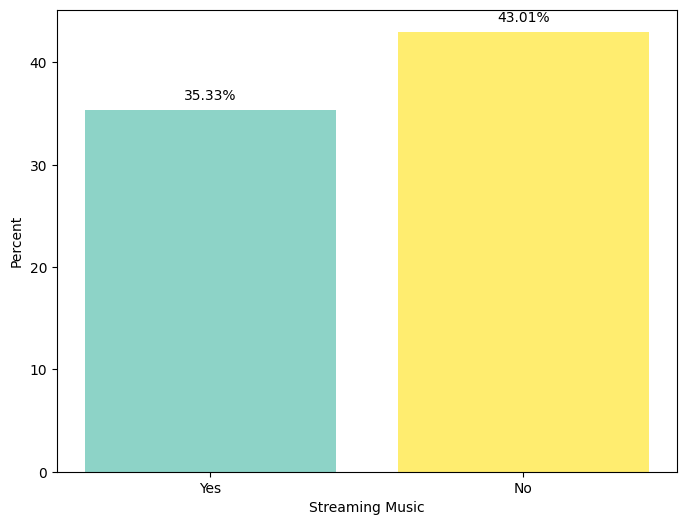

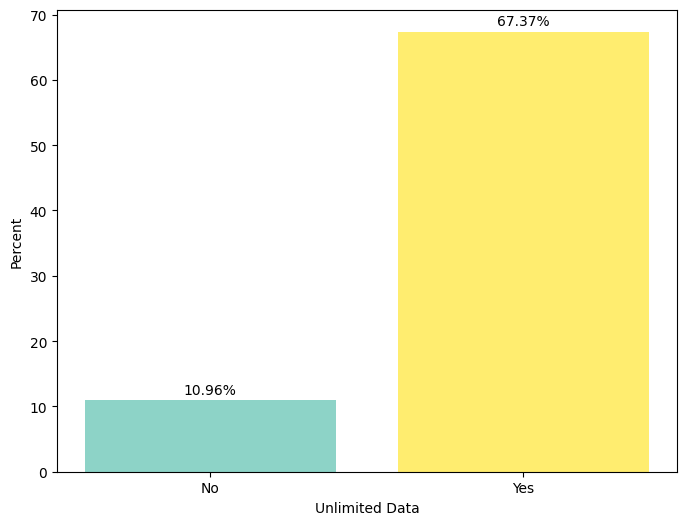

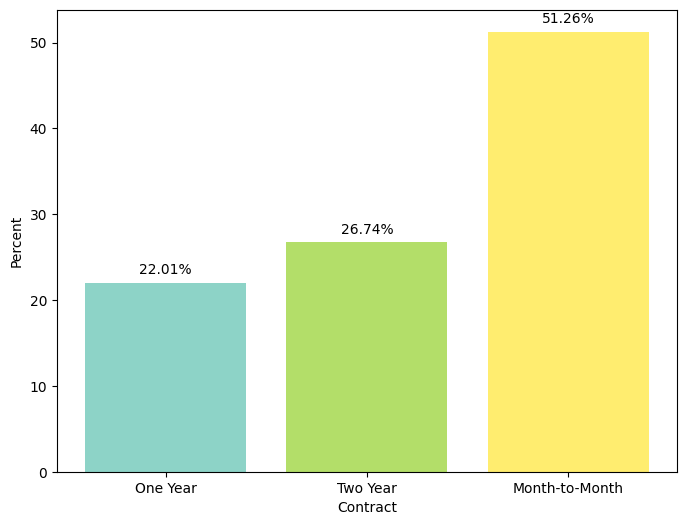

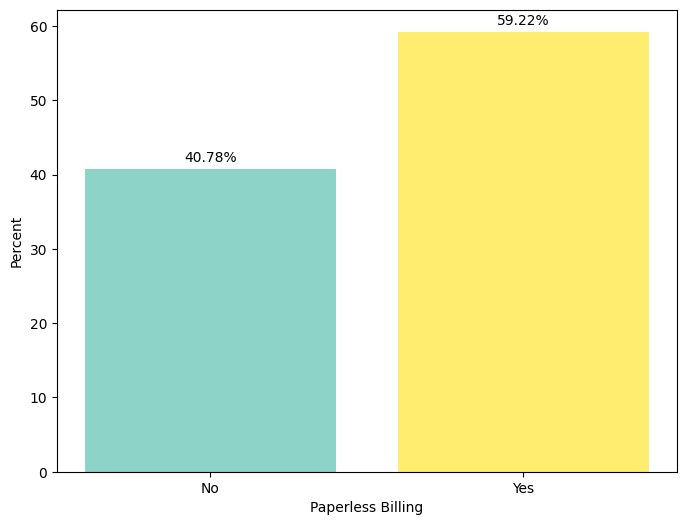

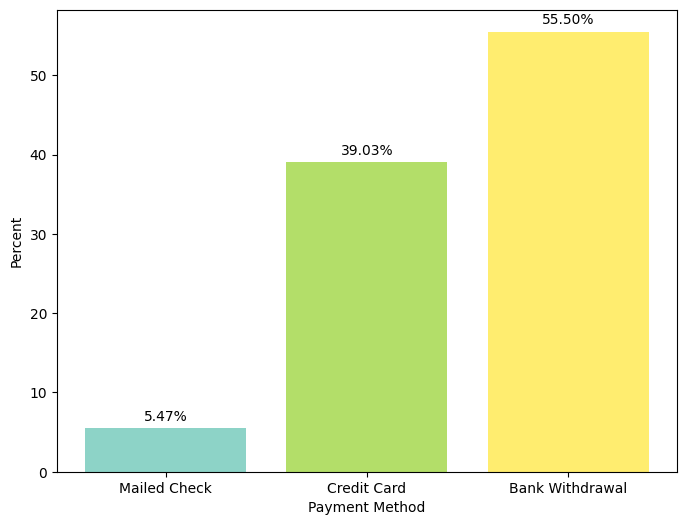

In [17]:
for column in object_columns:
    plot_bar_chart_with_percent_label(df,column,ascending=True,gap_label_bar=1,figsize = (8,6))

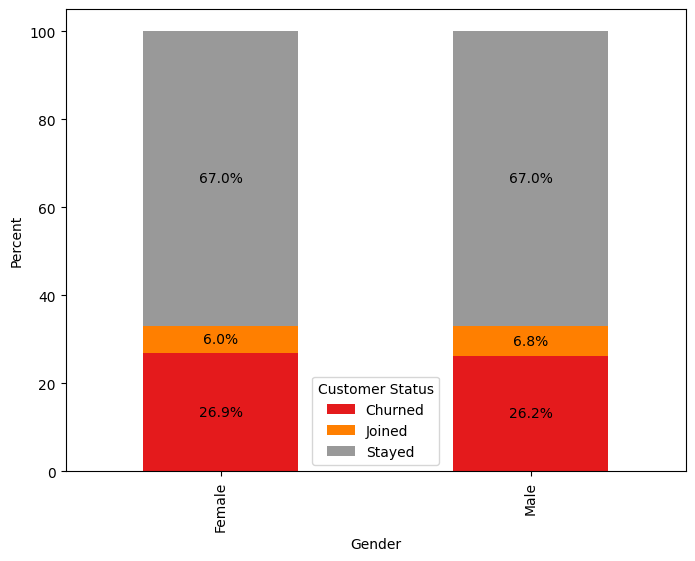

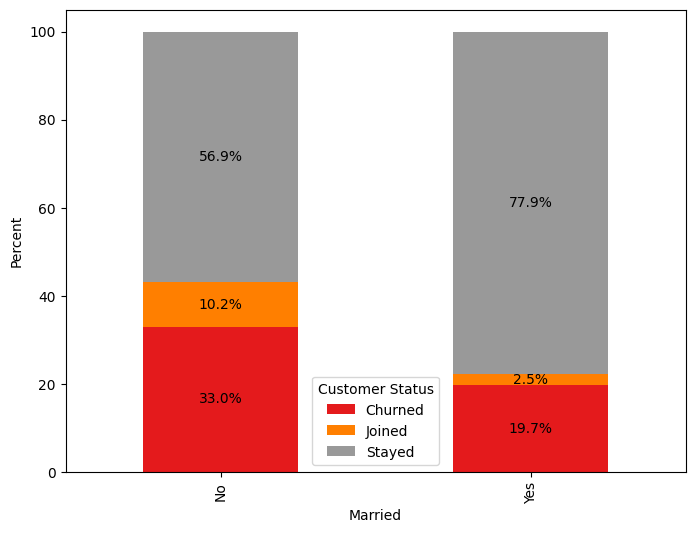

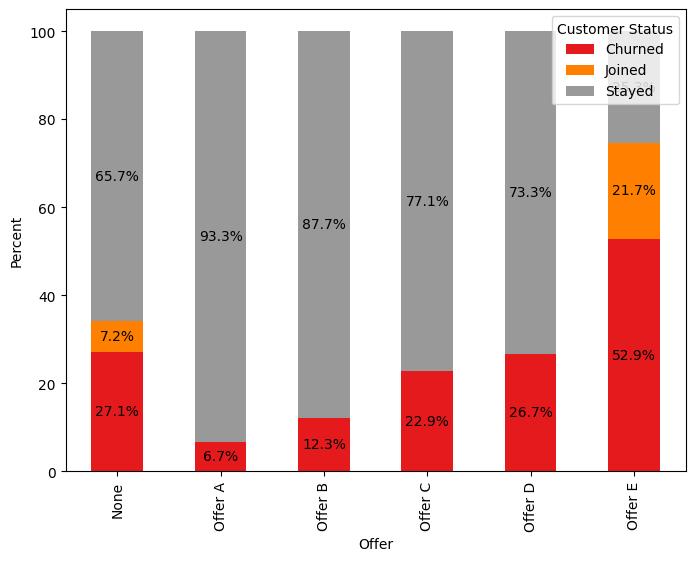

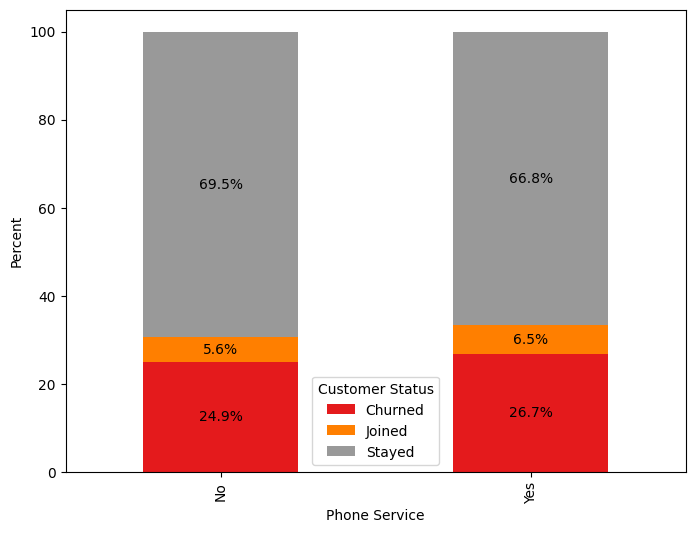

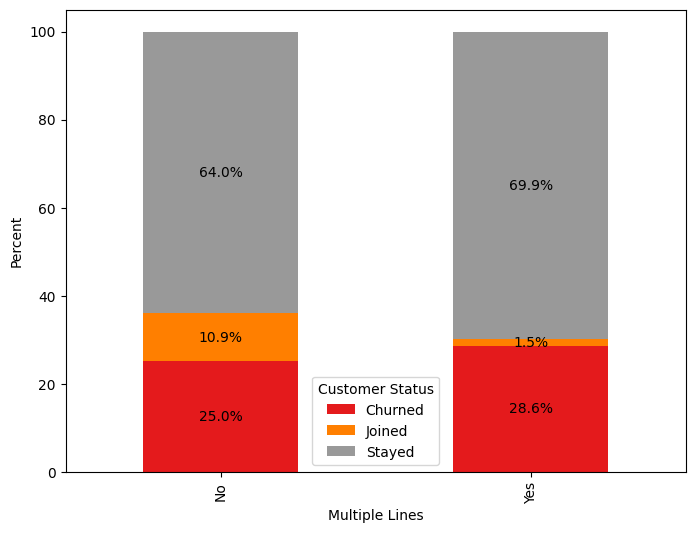

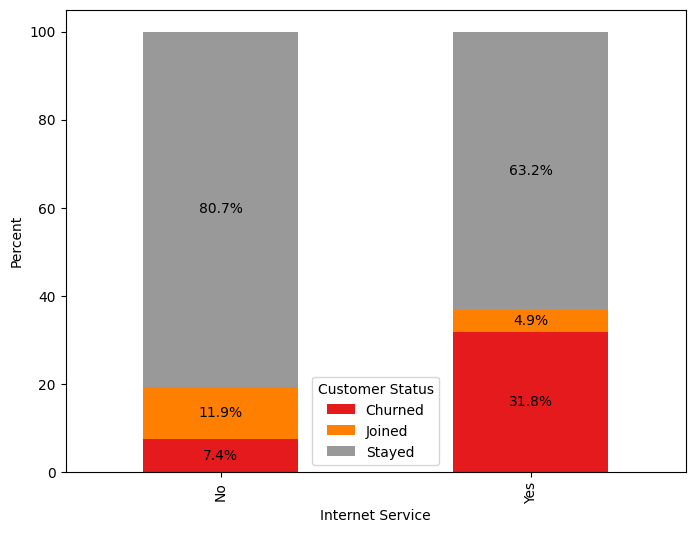

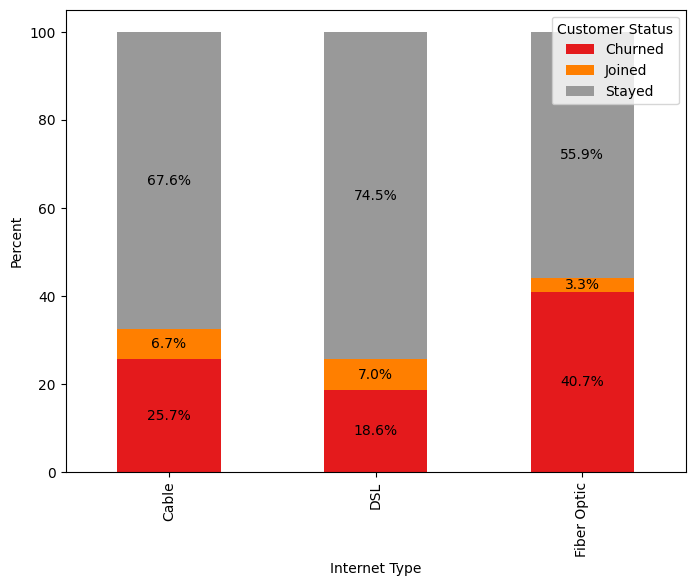

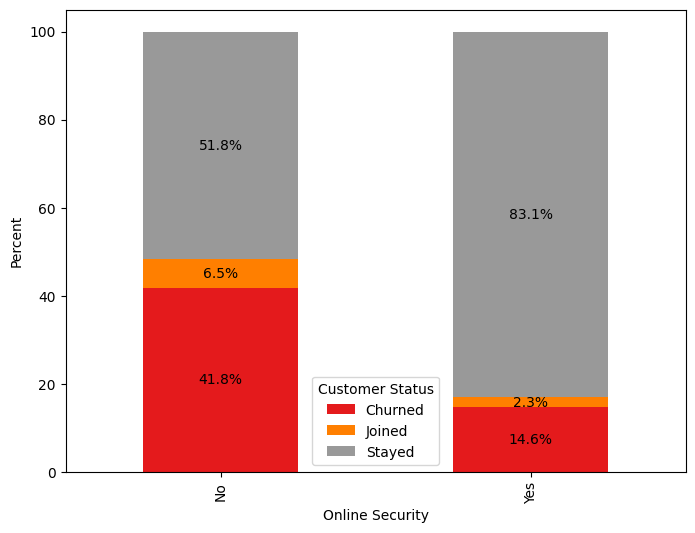

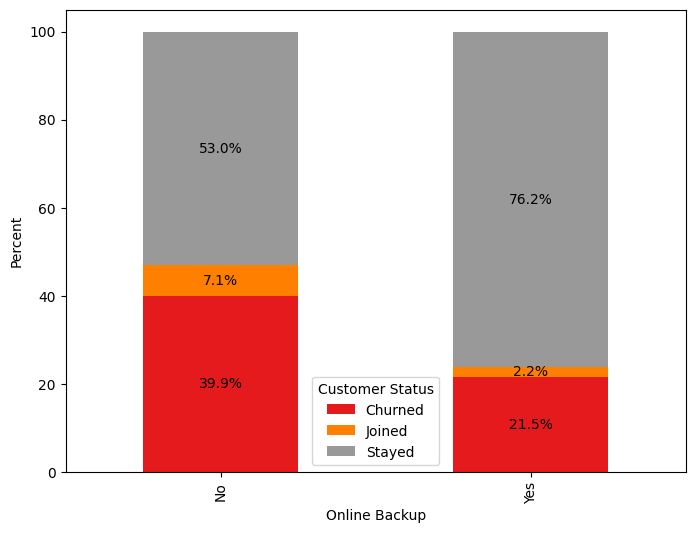

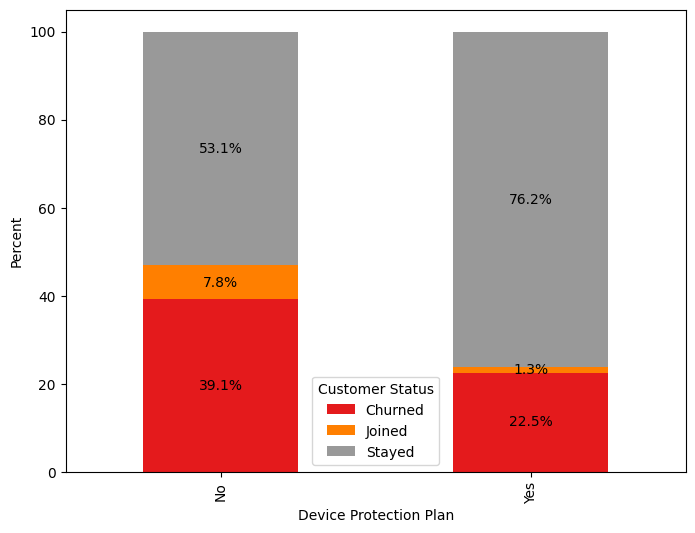

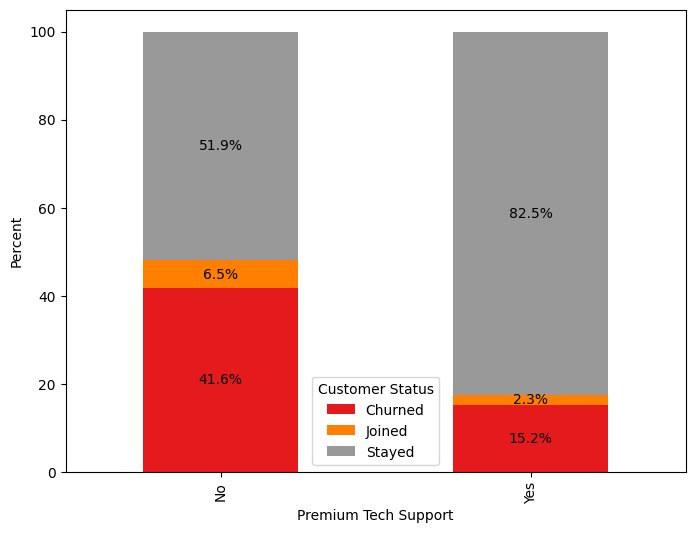

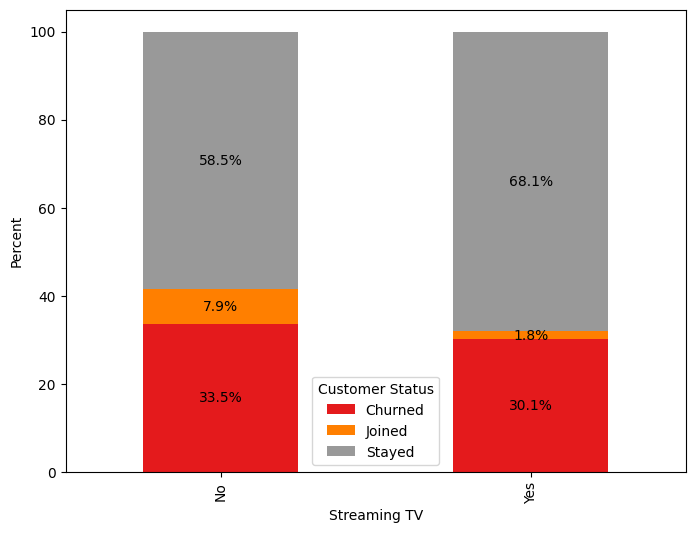

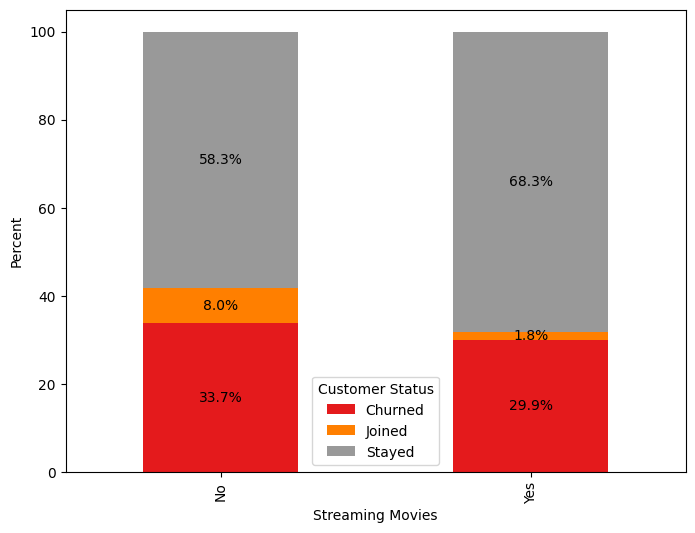

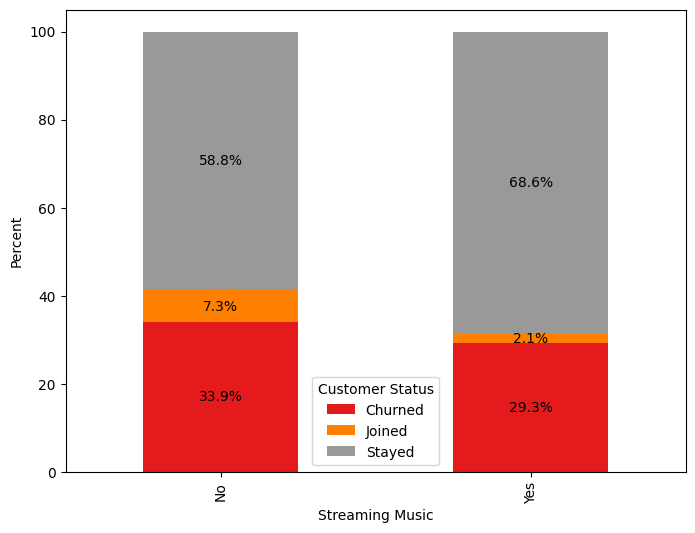

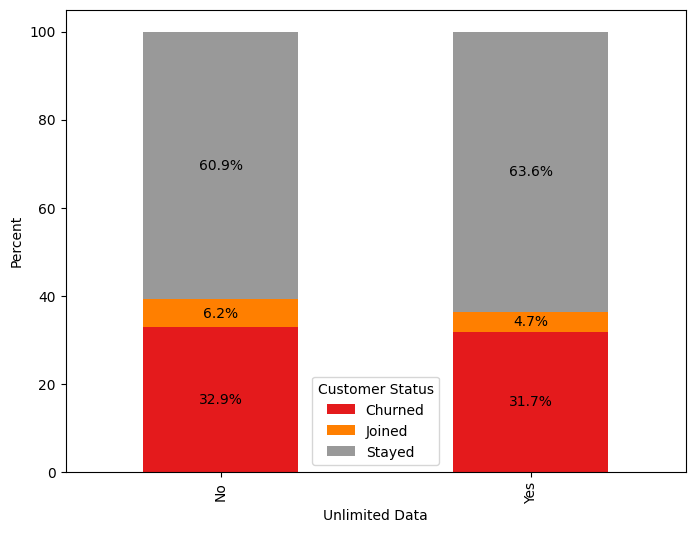

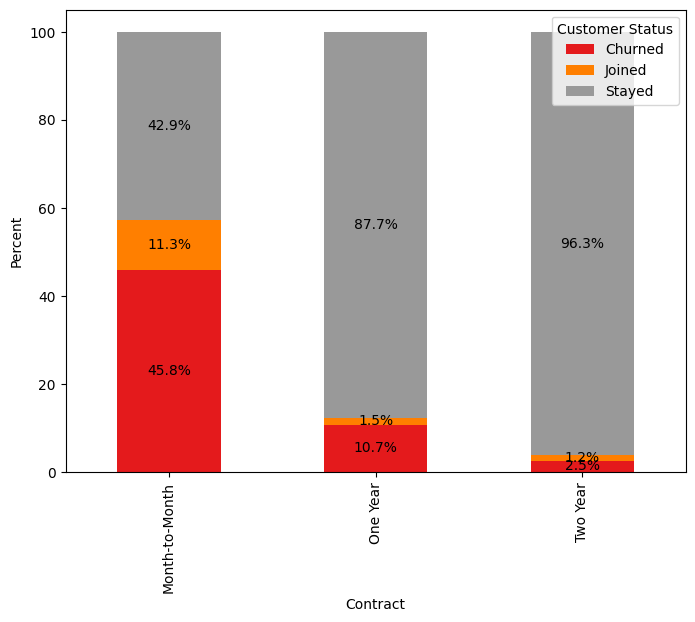

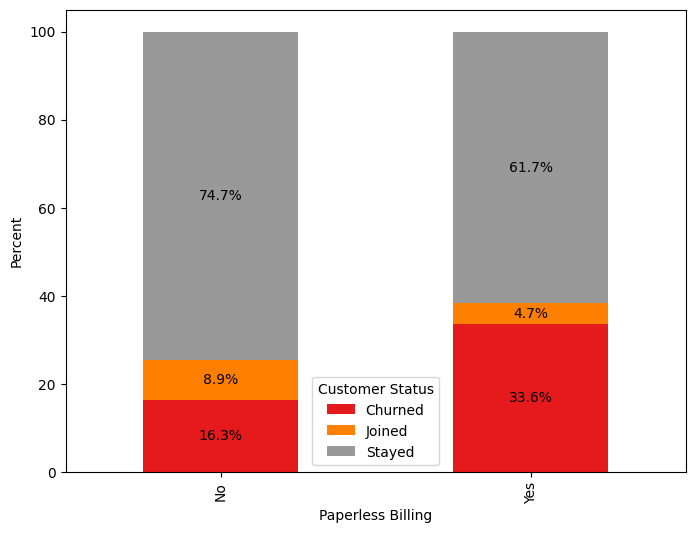

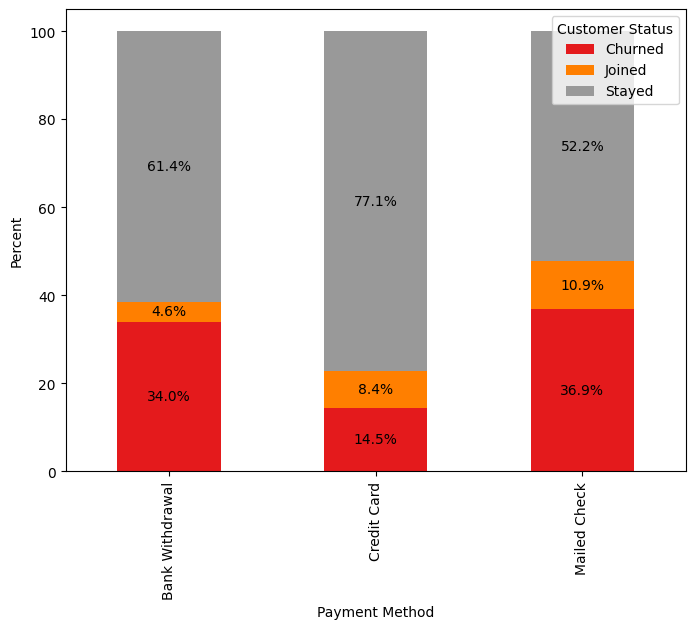

In [18]:
for column in object_columns:
    plot_stacked_bar_with_percent_label(df,x_column=column,stacked_column='Customer Status',figsize = (8,6))

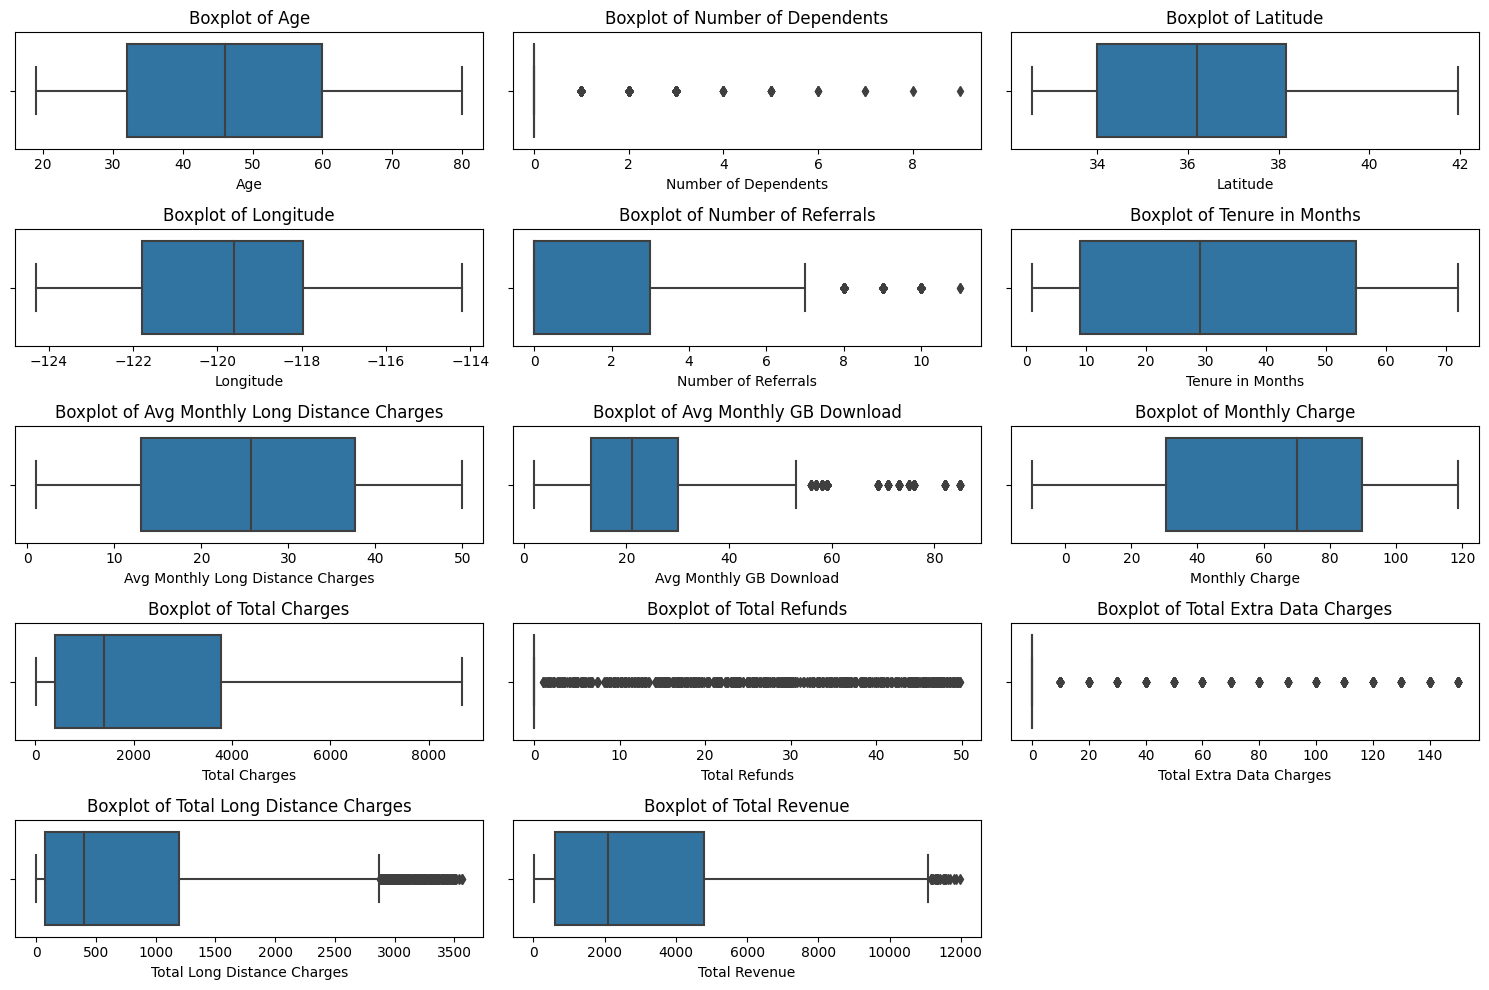

In [19]:
# Get a list of integer columns (assuming df is your DataFrame)
integer_columns = df.select_dtypes(include=['int', 'float']).columns

# Set the number of columns per row in the subplots grid
num_cols = 3  

# Calculate the number of rows needed
num_rows = (len(integer_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Iterate through integer columns and create basic boxplots
for i, column in enumerate(integer_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)

# Remove empty subplots if necessary
for i in range(len(integer_columns), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()


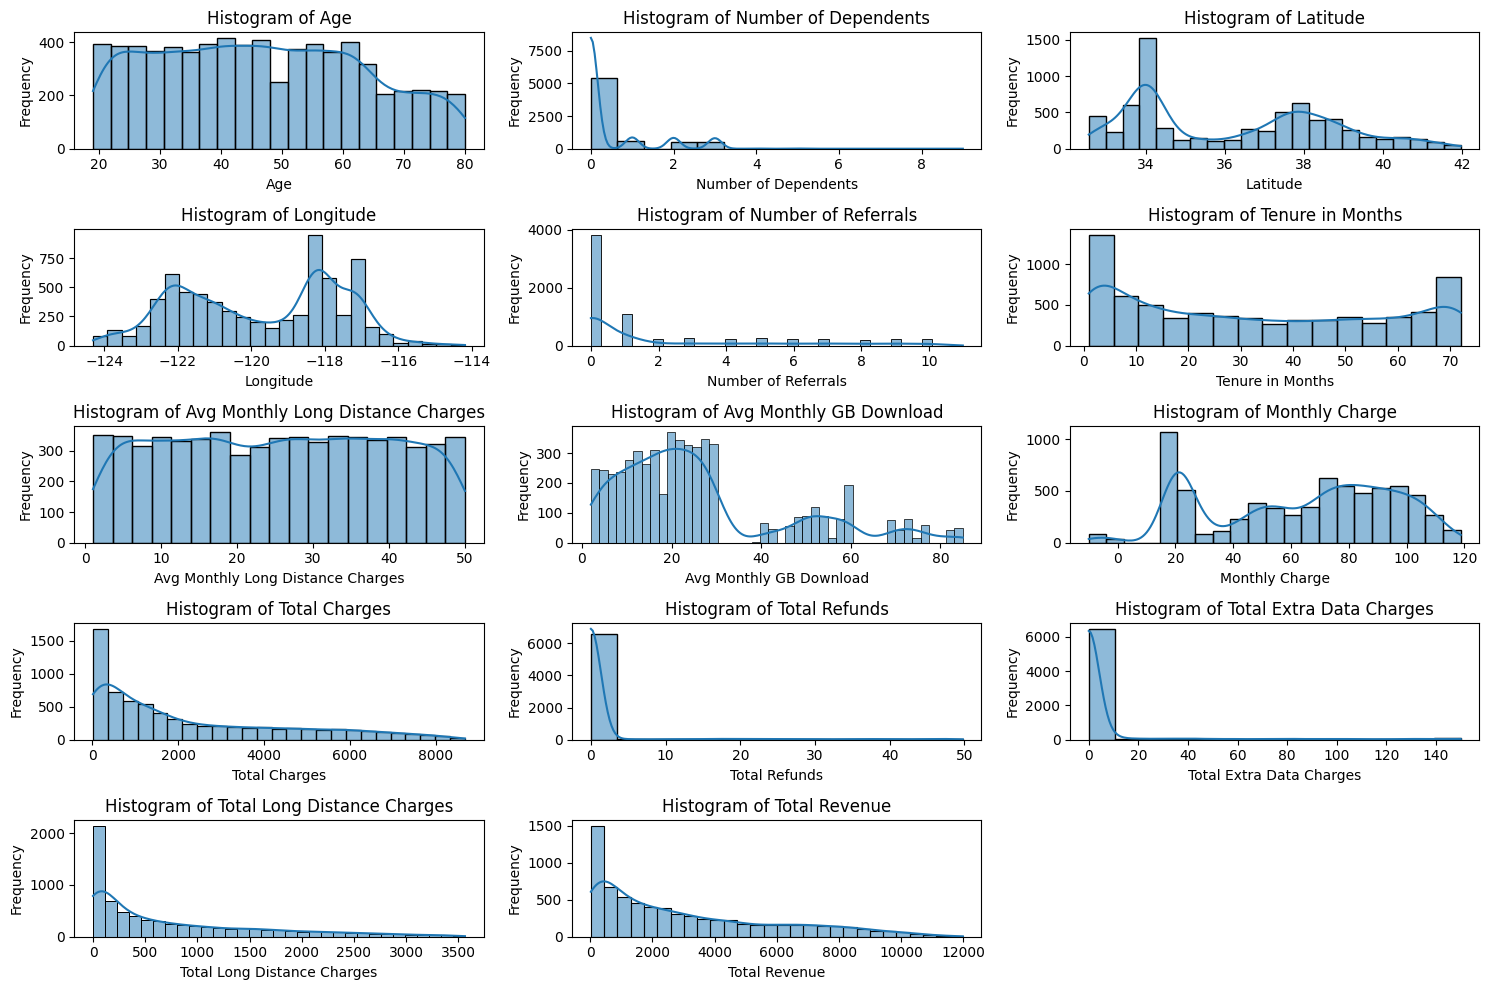

In [20]:
# Get a list of all numeric columns (both integer and float)
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Set the number of columns per row in the subplots grid
num_cols = 3  

# Calculate the number of rows needed
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Iterate through numeric columns and create histograms
for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.histplot(df[column], ax=ax, kde=True)  # Use sns.histplot for histograms
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove empty subplots if necessary
for i in range(len(numeric_columns), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()


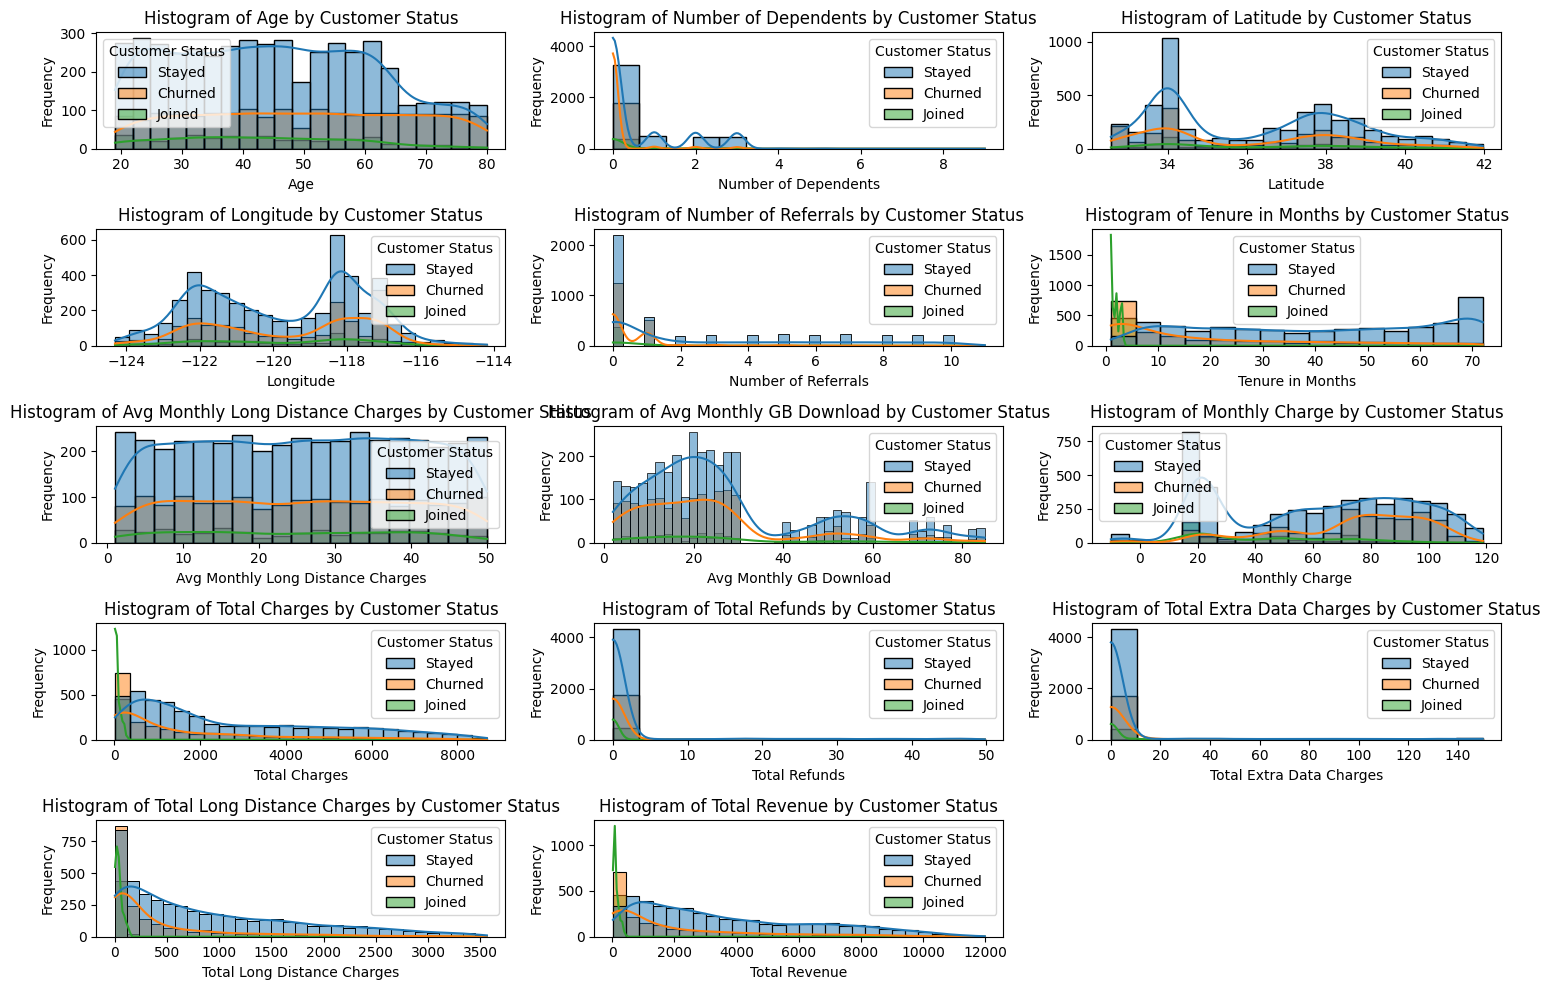

In [21]:
# Get a list of all numeric columns (both integer and float)
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Set the number of columns per row in the subplots grid
num_cols = 3  

# Calculate the number of rows needed
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Iterate through numeric columns and create histograms with hue='Customer Status'
for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.histplot(data=df, x=column, hue='Customer Status', ax=ax, kde=True)  # Use sns.histplot with hue
    ax.set_title(f'Histogram of {column} by Customer Status')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove empty subplots if necessary
for i in range(len(numeric_columns), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()


# Preprocessing

In [22]:
missing = df.isna().sum()*100/len(df)
missing[missing>0].sort_values(ascending=False)

Churn Category                       73.463013
Churn Reason                         73.463013
Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech Support                 21.666903
Streaming TV                         21.666903
Streaming Movies                     21.666903
Streaming Music                      21.666903
Unlimited Data                       21.666903
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
dtype: float64

In [23]:
# 73% is huge number to fill dropping this column would help
df.drop(columns=['Churn Category', 'Churn Reason'] , inplace=True)

In [24]:
df.shape

(7043, 33)

In [25]:
# Identify rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Create a new DataFrame containing only the rows with missing values
df_missing_rows = pd.DataFrame(rows_with_missing_values)

# Display the new DataFrame
print(df_missing_rows)


      Gender  Age Married  Number of Dependents   Latitude   Longitude  \
10      Male   47      No                     0  32.993560 -117.207121   
14    Female   39      No                     0  34.704340 -120.026090   
16    Female   52     Yes                     1  38.060264 -122.830646   
19      Male   67      No                     0  37.161544 -121.649371   
20    Female   79     Yes                     0  37.375816 -119.739935   
...      ...  ...     ...                   ...        ...         ...   
7028  Female   56     Yes                     1  39.937017 -121.058043   
7032    Male   62     Yes                     3  37.774633 -122.274434   
7033    Male   24      No                     0  39.559709 -120.345639   
7037  Female   36      No                     0  33.362575 -117.299644   
7042    Male   36     Yes                     0  39.600599 -120.636358   

      Number of Referrals  Tenure in Months    Offer Phone Service  ...  \
10                      0           

In [26]:
df_missing_rows.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
10,Male,47,No,0,32.993560,-117.207121,0,54,None,No,...,Two Year,No,Credit Card,45.20,2460.55,0.0,0,0.0,2460.55,Stayed
14,Female,39,No,0,34.704340,-120.026090,0,56,None,No,...,Two Year,No,Bank Withdrawal,45.05,2560.10,0.0,0,0.0,2560.10,Stayed
16,Female,52,Yes,1,38.060264,-122.830646,0,34,None,No,...,One Year,No,Credit Card,61.25,1993.20,0.0,0,0.0,1993.20,Stayed
19,Male,67,No,0,37.161544,-121.649371,0,1,None,No,...,Month-to-Month,Yes,Bank Withdrawal,25.10,25.10,0.0,0,0.0,25.10,Churned
20,Female,79,Yes,0,37.375816,-119.739935,0,50,None,Yes,...,One Year,No,Bank Withdrawal,25.20,1306.30,0.0,0,1571.5,2877.80,Stayed


In [27]:
df_missing_rows.iloc[21] # Let's examine the rows with missing value from df_missing_rows
# As you can see many rows missing from the same entry
# I will drop the missing rows,  missing values belongs to same user

Gender                                        Female
Age                                               21
Married                                          Yes
Number of Dependents                               0
Latitude                                   41.572813
Longitude                                -124.035011
Number of Referrals                                9
Tenure in Months                                  10
Offer                                        Offer D
Phone Service                                    Yes
Avg Monthly Long Distance Charges               49.6
Multiple Lines                                    No
Internet Service                                  No
Internet Type                                    NaN
Avg Monthly GB Download                          NaN
Online Security                                  NaN
Online Backup                                    NaN
Device Protection Plan                           NaN
Premium Tech Support                          

In [28]:
len(df_missing_rows)

2208

In [29]:
drop_rows = ['Internet Type','Avg Monthly GB Download','Online Security','Online Backup','Device Protection Plan',
               'Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data']

In [30]:
df.dropna(subset=drop_rows,inplace=True)

In [31]:
df.shape

(5517, 33)

In [32]:
missing = df.isna().sum()*100/len(df) 
missing[missing>0].sort_values(ascending=False)  # this much misisng values left


Avg Monthly Long Distance Charges    12.361791
Multiple Lines                       12.361791
dtype: float64

In [33]:
drop_rows1 = ['Avg Monthly Long Distance Charges','Multiple Lines']
df.dropna(subset=drop_rows1, inplace=True)

In [34]:
df.isnull().sum().sum()  # Total number of missing values

0

In [35]:
# To be more clear
df['Customer Status'] = df['Customer Status'].replace('Joined','Stayed')
df['Customer Status'].value_counts()

Stayed     3249
Churned    1586
Name: Customer Status, dtype: int64

In [36]:
# Get a list of object (categorical) columns
object_columns = df.select_dtypes(include=['object']).columns

# Iterate through object columns and print column name and unique values on the same line
for column in object_columns:
    unique_values = df[column].unique()
    unique_values_str = ', '.join(map(str, unique_values))
    print(f'Column:----- {column}:  [{unique_values_str}]')


Column:----- Gender:  [Female, Male]
Column:----- Married:  [Yes, No]
Column:----- Offer:  [None, Offer E, Offer D, Offer A, Offer B, Offer C]
Column:----- Phone Service:  [Yes]
Column:----- Multiple Lines:  [No, Yes]
Column:----- Internet Service:  [Yes]
Column:----- Internet Type:  [Cable, Fiber Optic, DSL]
Column:----- Online Security:  [No, Yes]
Column:----- Online Backup:  [Yes, No]
Column:----- Device Protection Plan:  [No, Yes]
Column:----- Premium Tech Support:  [Yes, No]
Column:----- Streaming TV:  [Yes, No]
Column:----- Streaming Movies:  [No, Yes]
Column:----- Streaming Music:  [No, Yes]
Column:----- Unlimited Data:  [Yes, No]
Column:----- Contract:  [One Year, Month-to-Month, Two Year]
Column:----- Paperless Billing:  [Yes, No]
Column:----- Payment Method:  [Credit Card, Bank Withdrawal, Mailed Check]
Column:----- Customer Status:  [Stayed, Churned]


In [37]:
# Get a list of object (categorical) columns
object_columns = df.select_dtypes(include=['object']).columns

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Iterate through object columns and print column name and unique values
for column in object_columns:
    # Label encode the column
    df[column] = label_encoder.fit_transform(df[column])
    
    unique_values = df[column].unique()
    unique_values_str = ', '.join(map(str, unique_values))
    print(f'Column:----- {column}:  [{unique_values_str}]')


Column:----- Gender:  [0, 1]
Column:----- Married:  [1, 0]
Column:----- Offer:  [0, 5, 4, 1, 2, 3]
Column:----- Phone Service:  [0]
Column:----- Multiple Lines:  [0, 1]
Column:----- Internet Service:  [0]
Column:----- Internet Type:  [0, 2, 1]
Column:----- Online Security:  [0, 1]
Column:----- Online Backup:  [1, 0]
Column:----- Device Protection Plan:  [0, 1]
Column:----- Premium Tech Support:  [1, 0]
Column:----- Streaming TV:  [1, 0]
Column:----- Streaming Movies:  [0, 1]
Column:----- Streaming Music:  [0, 1]
Column:----- Unlimited Data:  [1, 0]
Column:----- Contract:  [1, 0, 2]
Column:----- Paperless Billing:  [1, 0]
Column:----- Payment Method:  [1, 0, 2]
Column:----- Customer Status:  [1, 0]


<Axes: >

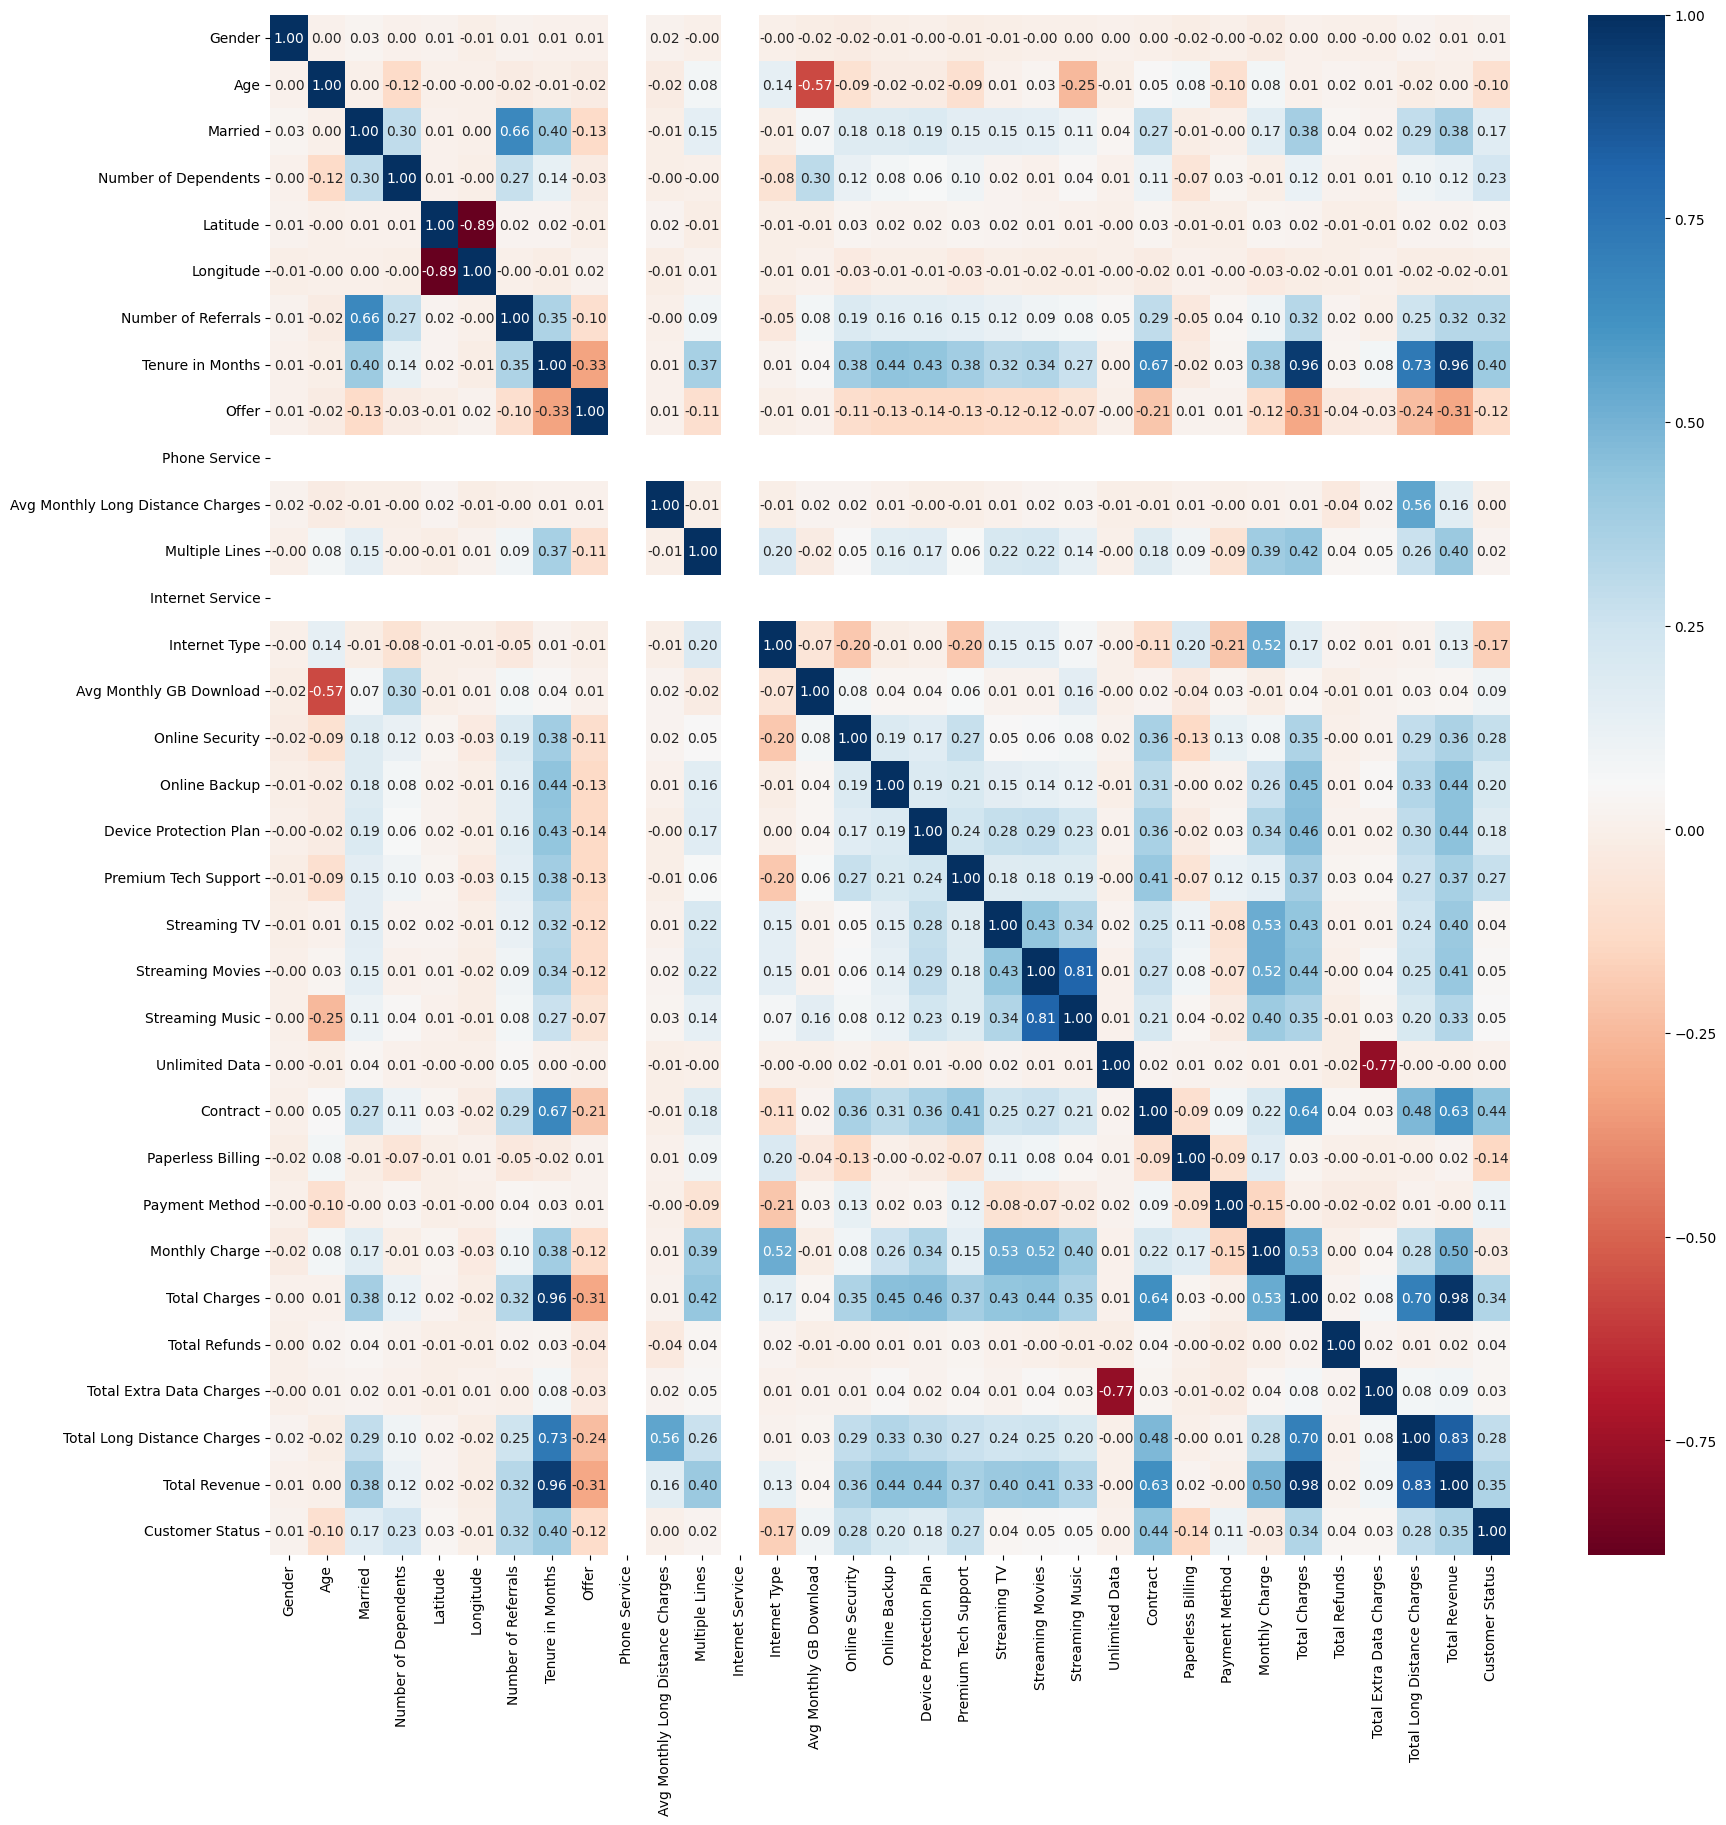

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, fmt = '.2f',cmap='RdBu')
# Negative Correlations between Avg. Monthly GB Download and Age
# Negative Correlations betweem Unlimited DAta and Total Extra Data charges
# No Correlations between 'Phone Services and Internet Services'

In [39]:
df.drop(columns=['Internet Service','Phone Service'],inplace=True)
df.shape

(4835, 31)

In [40]:
X = df.drop('Customer Status',axis=1)
y = df['Customer Status']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [41]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((3868, 30), (967, 30), (3868,), (967,))

In [42]:
X_test.shape[0]/X_train.shape[0]

0.25

# Removing Outliers From Data 

In [43]:
# Select columns with outliers to check
columns_with_outliers = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges',
                        'Total Long Distance Charges', 'Total Revenue']

# Set the IQR multiplier threshold for outlier detection
iqr_multiplier = 1.5

# Create a DataFrame to store IQR values
q1 = df[columns_with_outliers].quantile(0.25)
q3 = df[columns_with_outliers].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds for outlier detection
lower_bound = q1 - iqr_multiplier * iqr
upper_bound = q3 + iqr_multiplier * iqr

# Find data points where values are outside the bounds
outlier_indices = ((df[columns_with_outliers] < lower_bound) | (df[columns_with_outliers] > upper_bound)).any(axis=1)

# Remove outliers from the original DataFrame
X_train = X_train[~outlier_indices]
y_train = y_train[~outlier_indices]


In [44]:
X_train.shape, y_train.shape

((2244, 30), (2244,))

# Modelling

## Decision Tree Classifier

In [45]:
dt = DecisionTreeClassifier(class_weight='balanced',random_state=0)
param_grid = {
    'max_depth' : [3,4,5,6,7,8,9,10],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,2,3]    
}

grid_search = GridSearchCV(dt,param_grid,cv=5)
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [46]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [47]:
dt = DecisionTreeClassifier(max_depth=8,min_samples_leaf=3,min_samples_split=3,class_weight='balanced')
dt.fit(X_train,y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=3,
                       min_samples_split=3)

In [48]:
y_pred = dt.predict(X_test)
print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy Score: 74.66 %


In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')

# Calculate ROC-AUC score (for binary classification)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.75
Precision: 0.89
Recall: 0.72
F1-Score: 0.80
ROC-AUC Score: 0.76
Confusion Matrix:
[[246  59]
 [186 476]]


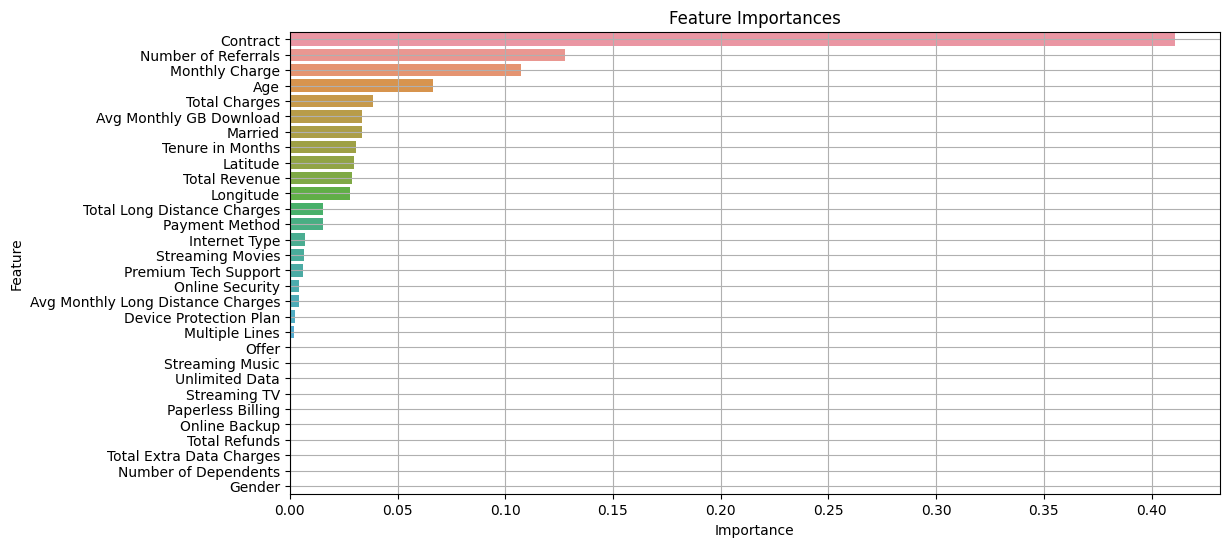

In [50]:
# Get feature importances from the trained model
feature_importances = dt.feature_importances_

# Get the corresponding feature names (assuming your features are in a DataFrame)
feature_names = X_train.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
plt.show()


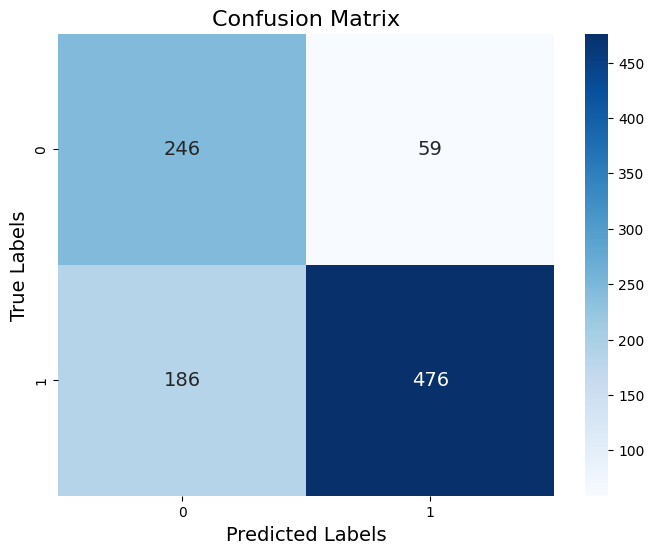

In [51]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14})

# Add labels and titles
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()


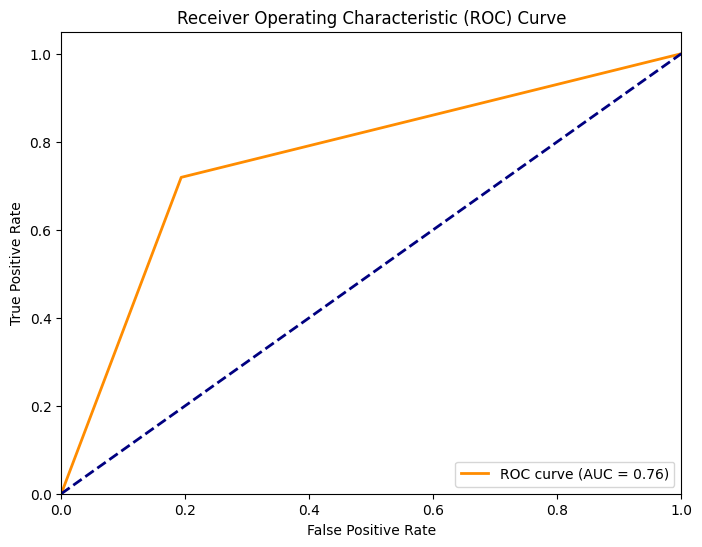

In [52]:
y_prob = dt.predict_proba(X_test)[:, 1] 
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Random Forest Classifier /W KFold

In [53]:
model = Pipeline([('RandomForestClassifier',RandomForestClassifier(random_state=0))])

In [54]:
splits = 5
score = 'accuracy'
models_score = []
kfold = KFold(n_splits=splits,random_state=0,shuffle=True)
result = cross_val_score(model,X_train,y_train,cv=kfold,scoring=score)

rf = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators' : [100,200],
     'max_depth' : [None,5,10,20],
    'min_samples_split' : [2,5,10],
    'max_features' : [None,'sqrt','log2']
}

grid_search = GridSearchCV(rf,param_grid,cv=kfold,n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_score_, grid_search.best_params_


(0.7954482182628062,
 {'max_depth': 10,
  'max_features': 'log2',
  'min_samples_split': 2,
  'n_estimators': 100})

In [55]:
result.mean()

0.791440303849825

In [56]:
rf = RandomForestClassifier(max_depth=None,max_features='log2',min_samples_split=2,n_estimators=200)
rf.fit(X_train,y_train)


RandomForestClassifier(max_features='log2', n_estimators=200)

In [57]:
y_pred = rf.predict(X_test)
print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy Score: 81.7 %


In [58]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')

# Calculate ROC-AUC score (for binary classification)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.82
Precision: 0.85
Recall: 0.89
F1-Score: 0.87
ROC-AUC Score: 0.78
Confusion Matrix:
[[204 101]
 [ 76 586]]


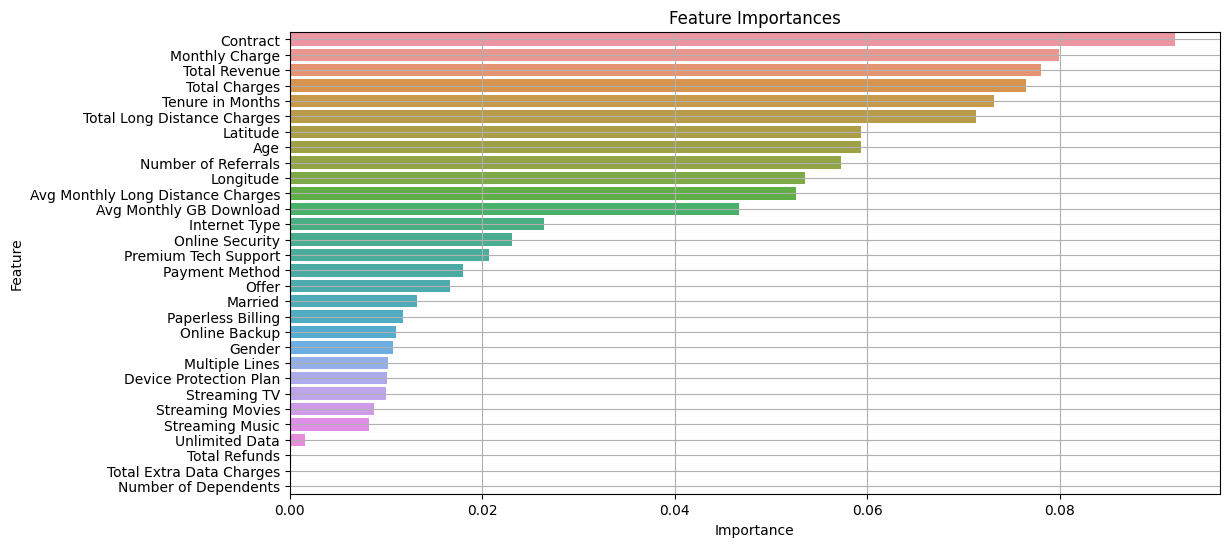

In [59]:
# Get feature importances from the trained model
feature_importances = rf.feature_importances_

# Get the corresponding feature names (assuming your features are in a DataFrame)
feature_names = X_train.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
plt.show()


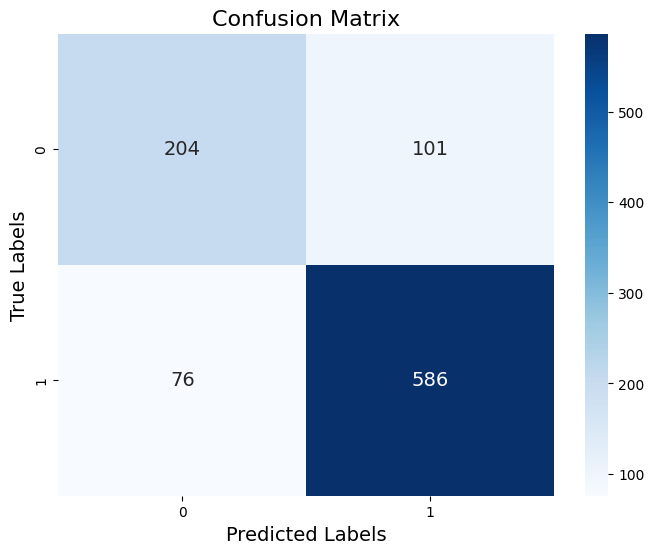

In [60]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14})

# Add labels and titles
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()


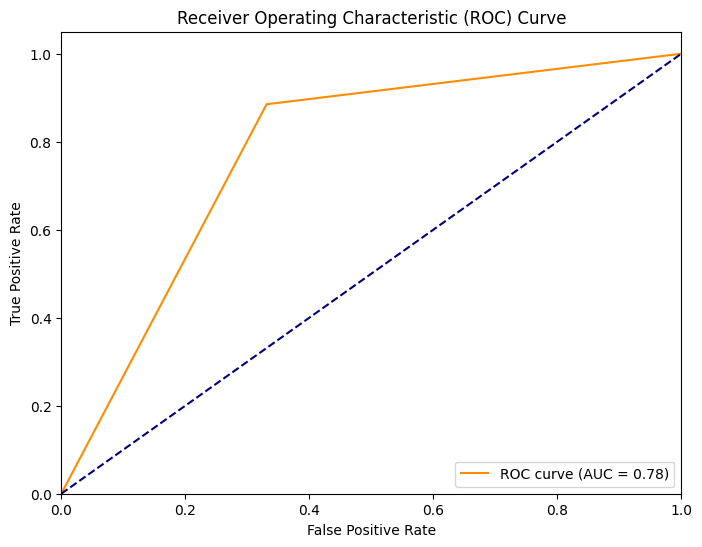

In [61]:
y_prob = rf.predict_proba(X_test)[:, 1]  

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',  label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# XGBoost Classifier

In [62]:
model = Pipeline([('XGBoostClassifier',XGBClassifier(random_state=0))])

In [63]:
splits = 5
score = 'accuracy'
models_score = []
kfold = KFold(n_splits=splits,random_state=0,shuffle=True)
result = cross_val_score(model,X_train,y_train,cv=kfold,scoring=score)

xgbclassifier = XGBClassifier(random_state=0)
param_grid = {
    'n_estimators' : [100,200],
     'max_depth' : [3,5,7],
    'learning_rate' : [0.1,0.01,0.001],
    'gamma' : [0,0.1,0.2],
    'alpha' : [0,0.1,1]
}

grid_search = GridSearchCV(xgbclassifier,param_grid,cv=kfold,n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_score_, grid_search.best_params_


(0.8083807270124087,
 {'alpha': 0.1,
  'gamma': 0.1,
  'learning_rate': 0.1,
  'max_depth': 3,
  'n_estimators': 100})

In [64]:
result.mean()

0.7860970808145084

In [65]:
model

Pipeline(steps=[('XGBoostClassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=0, ...))])

In [66]:
xgbclassifier = XGBClassifier(alpha=1,gamma=0.2,learning_rate=0.1,max_depth = 3,n_estimators=100)
xgbclassifier.fit(X_train,y_train)


XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [67]:
y_pred = xgbclassifier.predict(X_test)
print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy Score: 82.32 %


In [68]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')

# Calculate ROC-AUC score (for binary classification)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.82
Precision: 0.88
Recall: 0.86
F1-Score: 0.87
ROC-AUC Score: 0.80
Confusion Matrix:
[[224  81]
 [ 90 572]]


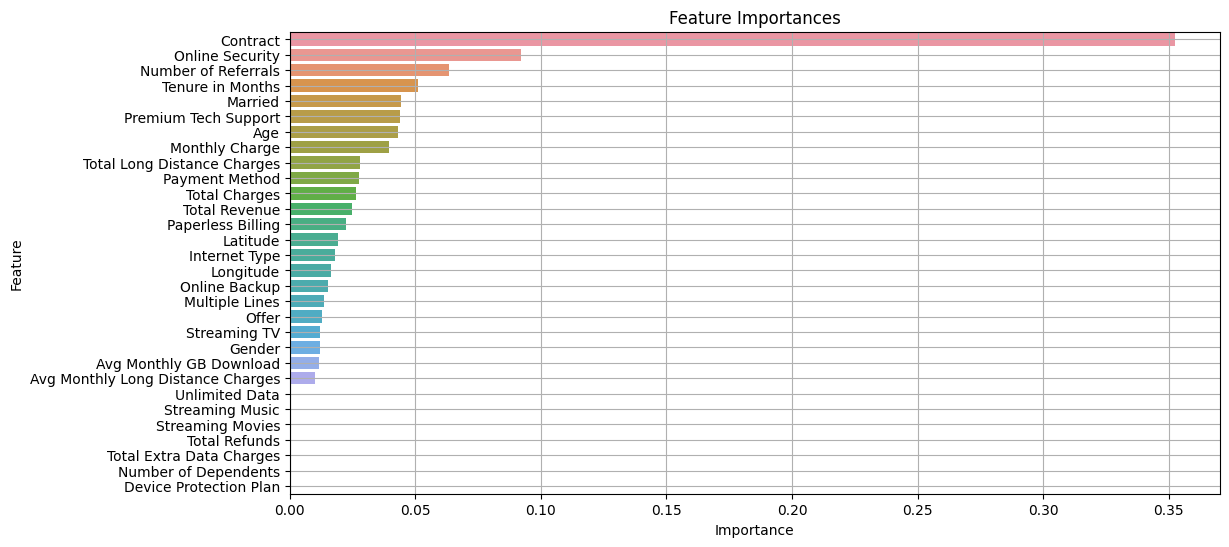

In [69]:
# Get feature importances from the trained model
feature_importances = xgbclassifier.feature_importances_

# Get the corresponding feature names (assuming your features are in a DataFrame)
feature_names = X_train.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
plt.show()


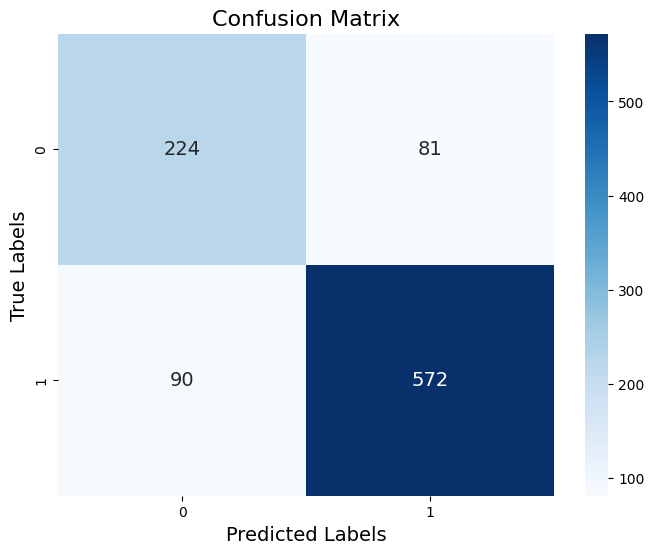

In [70]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14})

# Add labels and titles
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()


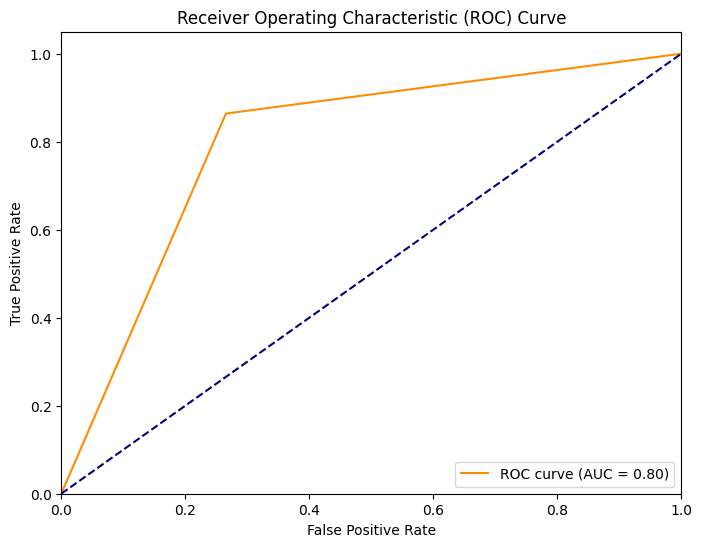

In [71]:
y_prob = xgbclassifier.predict_proba(X_test)[:, 1] 

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',  label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
